# Examples of data analysis

This notebook shows how to reuse metadata of image data example from the ABCE Open Data Project.

View the dataset here: 
    https://figshare.com/s/7255e5f83ccc576059bc  (to be updated)
    and
    https://github.com/building-energy/ABCE_Open_Data_Project/tree/main/internal_test_datasets/image

View this notebook on GitHub here: https://github.com/building-energy/ABCE_Open_Data_Project/tree/main/internal_test_datasets/image

## Setup

In [104]:
import pandas as pd 
from matplotlib import pyplot as plt 
import io

## Get metadata.json file from figshare or GitHub

The code below downloads this directly from the Figshare and GitHub repository. Then, set index and column name from metadata.

In [105]:
import urllib.request, json
import pprint

resourseCode = '0' # 0: GitHub, 1: figshare
if resourseCode == '0':
    metadata_url = 'https://raw.githubusercontent.com/building-energy/ABCE_Open_Data_Project/main/internal_test_datasets/image/dataset/dataset.csv-metadata.json'
elif resourseCode == '1':
    metadata_url='https://figshare.com/ndownloader/files/35875472?private_link=7255e5f83ccc576059bc'  # to be updated
with urllib.request.urlopen(metadata_url) as url:
    metadata_dict = json.loads(url.read())
    pprint.pprint(metadata_dict)

{'@context': ['http://www.w3.org/ns/csvw', {'@language': 'en'}],
 'dc:creator': 'ABCE Open Research Team',
 'dc:description': 'Photos taken arround ABCE, Loughborough University',
 'dc:titles': 'Test - image data',
 'tableSchema': {'aboutUrl': '#{ImageCode}',
                 'columns': [{'datatype': 'string',
                              'dc:description': 'This colums are file names of '
                                                'images and identifiers.',
                              'titles': 'ImageCode'},
                             {'datatype': 'string',
                              'dc:description': 'locactions of images.',
                              'titles': 'Location'},
                             {'datatype': 'string',
                              'dc:description': 'publishers of these images.',
                              'titles': 'Publisher'},
                             {'datatype': 'dateTime',
                              'dc:description': 'created time

## Get information of columns and index from metadata



In [106]:
columns = pd.Series(dtype=str)
for i,x in enumerate(metadata_dict['tableSchema']['columns']):
    column = pd.Series(x.get('titles'))
    # print(column)
    columns = pd.concat([columns, column], ignore_index=True)

print(columns)

metadata_index = metadata_dict['tableSchema'].get('aboutUrl')
index = metadata_index[2:-1]
print('index:',index)

0    ImageCode
1     Location
2    Publisher
3         Time
4    ImageType
5       Camera
6     Keywords
dtype: object
index: ImageCode


## Get CSV file from figshare or GitHub

This downloads the fictional image dataset (dataset.csv) file directly from the Figshare data repository and GitHub.  

In [114]:
if resourseCode == '0':
    # from GitHub
    url='https://raw.githubusercontent.com/building-energy/ABCE_Open_Data_Project/main/internal_test_datasets/image/dataset/dataset.csv'  # csv url address
elif resourseCode == '1':
    # from figshare
    url='https://figshare.com/ndownloader/files/35875475?private_link=7255e5f83ccc576059bc'  # to be updated

df_data = pd.read_csv(url)
df_data.columns = df_data.columns.str.replace(' ','')
df_data = df_data.set_index(index)
df_data.head()

,Location,Publisher,Time,ImageType,Camera,Keywords
ImageCode,,,,,,
IMG_0517,Sir Frank Gibb,Open Research Team,23/05/2022 09:54,JPEG,iPhone 13,"Sir Frank Gibb, ABCE"
IMG_0518,green near ABCE,Open Research Team,24/05/2022 09:56,JPEG,iPhone 14,ABCE
IMG_0519,corridor to Sir Frank Gibb,Open Research Team,25/05/2022 09:57,JPEG,iPhone 15,ABCE
IMG_0520,rest near ABCE,Open Research Team,26/05/2022 09:58,JPEG,iPhone 16,ABCE
IMG_0521,John Pickford,Open Research Team,27/05/2022 09:58,JPEG,iPhone 17,"John Pickford, WEDC"


## Show image samples

This is an example to show image samples for a quick review.

ImageCode : IMG_0517
Location : Sir Frank  Gibb
Publisher : Open Research Team
Time : 23/05/2022 09:54
ImageType : JPEG
Camera : iPhone 13
Keywords : Sir Frank  Gibb, ABCE


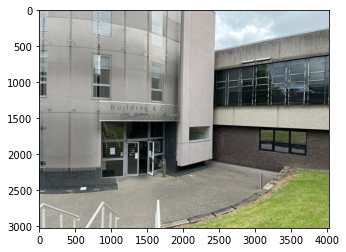

In [115]:
from PIL import Image
import matplotlib.pyplot as plt

if resourseCode == '0':
    fp = 'https://github.com/building-energy/ABCE_Open_Data_Project/raw/main/internal_test_datasets/image/dataset/IMG_0517.JPEG'
elif resourseCode == '1':
    fp = 'https://figshare.com/ndownloader/files/35310949?private_link=7255e5f83ccc576059bc'   # to be updated

imageCode = "IMG_0517"
urllib.request.urlretrieve(fp, imageCode)
image = Image.open(imageCode)
plt.imshow(image)

col = df_data.columns

for i,x in enumerate(metadata_dict['tableSchema']['columns']):
    column = x.get('titles')

    if i == 0:
        print(column,':',imageCode)
    else:
        print(column,':',df_data.loc[imageCode, column])
    
